In [1]:
import torch
from utils.diffusionmodel import DiffusionModelPipeline

c:\Users\wolfg\OneDrive\Documents\Projects\OMI\my-omi-code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dit_params = {
    'channels': 384,
    'nBlocks': 8,
    'inC': 16, 
    'nHeads': 8,
    'patchSize': 2
}

cat_params = {
    'input_dim': 768,  # T5-base hidden size
    'hidden_dim': 512,
    'output_dim': 256,
    'num_layers': 3,
    'num_heads': 8
}

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DiffusionModelPipeline(dit_params = dit_params,
                       cat_params = cat_params,
                       device=device)

## Test Gen

In [6]:
image = model.generate('a beautiful sunset over the ocean', num_inference_steps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\wolfg\OneDrive\Documents\Projects\OMI\my-omi-code\utils\dit.py:105: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attnOutput = torch.nn.functional.scaled_dot_product_attention(q, k, v)
100%|██████████| 1000/1000 [00:17<00:00, 56.11it/s]


In [7]:
image = model('a beautiful sunset over the ocean', num_inference_steps=1000)


100%|██████████| 1000/1000 [00:17<00:00, 56.54it/s]


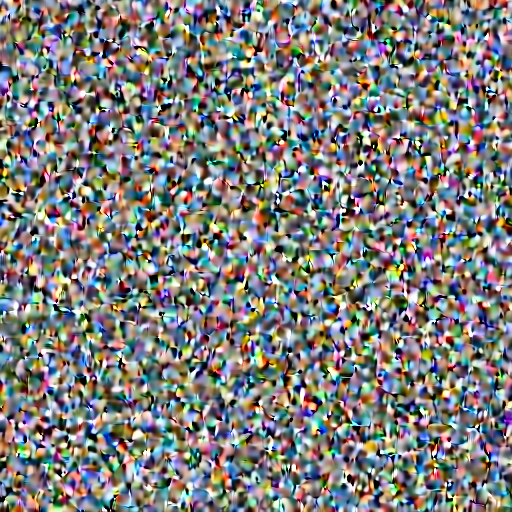

In [6]:
image[0]

## Test Training

In [12]:
from datasets import load_dataset

# dataset = load_dataset("openmodelinitiative/initial-test-dataset")
dataset = load_dataset("data/initial-test-dataset")

Generating train split: 1 examples [00:00, 53.30 examples/s]


In [13]:
dataset

DatasetDict({
    train: Dataset({
        features: ['_data_files', '_fingerprint', '_format_columns', '_format_kwargs', '_format_type', '_output_all_columns', '_split'],
        num_rows: 1
    })
})

In [25]:
dataset['train'].features['_data_files']

[{'filename': Value(dtype='string', id=None)}]